In [1]:
import pandas as pd

# Читаем файлы с правильными параметрами
visits_df = pd.read_csv(
    'visits.csv',
    sep=',',                    # разделитель — запятая
    quotechar='"',              # кавычки используются для строк с запятыми
    encoding='utf-8',           # кодировка
    on_bad_lines='skip'         # пропускаем строки с ошибками
)

registrations_df = pd.read_csv(
    'registrations.csv',
    sep=',',
    encoding='utf-8',
    on_bad_lines='skip'
)

# Проверяем
print("=== Визиты ===")
print(visits_df.head())
print("\n=== Регистрации ===")
print(registrations_df.head())

# Описание данных
print("\n=== Описание визитов ===")
print(visits_df.describe(include='all'))
print("\n=== Описание регистраций ===")
print(registrations_df.describe(include='all'))

=== Визиты ===
                                   uuid platform  \
0  1de9ea66-70d3-4a1f-8735-df5ef7697fb9      web   
1  f149f542-e935-4870-9734-6b4501eaf614      web   
2  f149f542-e935-4870-9734-6b4501eaf614      web   
3  08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   
4  08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   

                                          user_agent                 date  
0  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...  2023-03-01T13:29:22  
1  Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...  2023-03-01T16:44:28  
2  Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...  2023-03-06T06:12:36  
3  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...  2023-03-01T20:16:37  
4  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...  2023-03-05T17:42:47  

=== Регистрации ===
                  date  user_id                    email platform  \
0  2023-03-01T00:25:39  8838849     joseph95@example.org      web   
1  2023-03-01T14:53:01  8741065  janetsuarez@example.net 

In [2]:
import pandas as pd
import requests

# Базовый URL API
BASE_URL = "https://data-charts-api.hexlet.app"
# Период
START_DATE = "2023-03-01"
END_DATE = "2023-09-01"

# Запрос на визиты
visits_response = requests.get(f"{BASE_URL}/visits?begin={START_DATE}&end={END_DATE}")
visits_response.raise_for_status()  # Проверка ошибок
visits_data = visits_response.json()

# Запрос на регистрации
regs_response = requests.get(f"{BASE_URL}/registrations?begin={START_DATE}&end={END_DATE}")
regs_response.raise_for_status()
registrations_data = regs_response.json()

# Преобразуем в DataFrame
visits_df_api = pd.DataFrame(visits_data)
registrations_df_api = pd.DataFrame(registrations_data)

# Проверяем
print("=== Визиты (API) ===")
print(visits_df_api.head())

print("\n=== Регистрации (API) ===")
print(registrations_df_api.head())

=== Визиты (API) ===
                               visit_id platform  \
0  1de9ea66-70d3-4a1f-8735-df5ef7697fb9      web   
1  f149f542-e935-4870-9734-6b4501eaf614      web   
2  08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   
3  19322fed-157c-49c6-b16e-2d5cabeb9592      web   
4  04762a22-3c9f-40c9-9ac9-6628c4381836      web   

                                          user_agent             datetime  
0  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T10:36:22  
1  Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...  2023-03-01T06:25:00  
2  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...  2023-03-01T10:26:13  
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...  2023-03-01T12:33:06  
4  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T01:38:35  

=== Регистрации (API) ===
              datetime                               user_id  \
0  2023-03-01T07:40:13  2e0f6bb8-b029-4f45-a786-2b53990d37f1   
1  2023-03-01T13:14:00  f007f97c-9d8b-48b5-af08-119bb8f

In [3]:
print("=== Визиты (API) ===")
print(visits_df_api.head(3))
print("\n=== Регистрации (API) ===")
print(registrations_df_api.head(3))
print(type(visits_df_api))
print(type(registrations_df_api))
print(f"Визиты: {visits_df_api.shape}")        # например: (1000, 4)
print(f"Регистрации: {registrations_df_api.shape}")  # например: (1000, 5)

=== Визиты (API) ===
                               visit_id platform  \
0  1de9ea66-70d3-4a1f-8735-df5ef7697fb9      web   
1  f149f542-e935-4870-9734-6b4501eaf614      web   
2  08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   

                                          user_agent             datetime  
0  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T10:36:22  
1  Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...  2023-03-01T06:25:00  
2  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...  2023-03-01T10:26:13  

=== Регистрации (API) ===
              datetime                               user_id  \
0  2023-03-01T07:40:13  2e0f6bb8-b029-4f45-a786-2b53990d37f1   
1  2023-03-01T13:14:00  f007f97c-9d8b-48b5-af08-119bb8f6d9b6   
2  2023-03-01T03:05:50  24ff46ae-32b3-4a74-8f27-7cf0b8f32f15   

                        email platform registration_type  
0           ebyrd@example.org      web            google  
1    knightgerald@example.org      web             email  
2  ch

In [7]:
# 1. Преобразуем datetime в формат pandas
import pandas as pd
visits_df_api['datetime'] = pd.to_datetime(visits_df_api['datetime'])
registrations_df_api['datetime'] = pd.to_datetime(registrations_df_api['datetime'])

# 2. Удаляем ботов (если в user_agent есть "bot")
visits_clean = visits_df_api[~visits_df_api['user_agent'].str.contains('bot', case=False, na=False)]

# 3. Берём последний визит для каждого visit_id
visits_clean_sorted = visits_clean.sort_values('datetime')
visits_deduped = visits_clean_sorted.drop_duplicates(subset='visit_id', keep='last').copy()

# 4. Создаём date_group (только дата без времени)
visits_deduped['date_group'] = visits_deduped['datetime'].dt.date
registrations_df_api['date_group'] = registrations_df_api['datetime'].dt.date

# 5. Группируем визиты
visits_grouped = visits_deduped.groupby(['date_group', 'platform']).size().reset_index(name='visits')

# 6. Группируем регистрации
registrations_grouped = registrations_df_api.groupby(['date_group', 'platform']).size().reset_index(name='registrations')

# 7. Объединяем и считаем конверсию
conversion_df = visits_grouped.merge(
    registrations_grouped,
    on=['date_group', 'platform'],
    how='left'
)

conversion_df['registrations'] = conversion_df['registrations'].fillna(0).astype(int)
conversion_df['conversion'] = (conversion_df['registrations'] / conversion_df['visits']) * 100

# 8. Сортируем по дате
conversion_df = conversion_df.sort_values('date_group').reset_index(drop=True)

# 9. Проверяем результат
print("=== Конверсия по дням и платформам ===")
print(conversion_df.head(10))

# 10. Сохраняем в JSON
final_df.to_json('ads.json', orient='columns')

=== Конверсия по дням и платформам ===
   date_group platform  visits  registrations  conversion
0  2023-03-01  android      75             61   81.333333
1  2023-03-01      ios      22             18   81.818182
2  2023-03-01      web     279              8    2.867384
3  2023-03-02  android      67             59   88.059701
4  2023-03-02      ios      31             24   77.419355
5  2023-03-02      web     515             23    4.466019
6  2023-03-03  android      26             22   84.615385
7  2023-03-03      ios      40             34   85.000000
8  2023-03-03      web     617             51    8.265802
9  2023-03-04  android      94             77   81.914894


In [6]:
import pandas as pd

# 1. Загружаем рекламные данные
ads_url = "https://drive.google.com/uc?id=12vCtGhJlcK_CBcs8ES3BfEPbk6OJ45Qj&export=download"
ads_df = pd.read_csv(ads_url)

# 2. Преобразуем дату — без указания формата (автоопределение ISO)
ads_df['date'] = pd.to_datetime(ads_df['date'])  # ← просто так — и всё заработает
ads_df['date_group'] = ads_df['date'].dt.date

# 3. Агрегируем по дате
ads_grouped = ads_df.groupby('date_group').agg({
    'cost': 'sum',
    'utm_campaign': 'first'
}).reset_index()

# 4. Агрегируем метрики по дате
metrics_total = conversion_df.groupby('date_group')[['visits', 'registrations']].sum().reset_index()

# 5. Объединяем
final_df = metrics_total.merge(ads_grouped, on='date_group', how='left')

# 6. Заполняем пропуски
final_df['cost'] = final_df['cost'].fillna(0).astype(int)
final_df['utm_campaign'] = final_df['utm_campaign'].fillna('none')

# 7. Сортируем и сохраняем
final_df = final_df.sort_values('date_group').reset_index(drop=True)
final_df.to_json('ads.json', orient='columns')

print(final_df.head())

   date_group  visits  registrations  cost                utm_campaign
0  2023-03-01     376             87   212  advanced_algorithms_series
1  2023-03-02     613            106   252  advanced_algorithms_series
2  2023-03-03     683            107   202  advanced_algorithms_series
3  2023-03-04     647            159   223  advanced_algorithms_series
4  2023-03-05     707            115   265  advanced_algorithms_series


In [69]:
# Задание 5
# Подготовительный этап
import pandas as pd
import matplotlib.pyplot as plt
import os

# Создаём папку charts
os.makedirs('./charts', exist_ok=True)

# Убедимся, что datetime в правильном формате
visits_deduped['datetime'] = pd.to_datetime(visits_deduped['datetime'])
registrations_df_api['datetime'] = pd.to_datetime(registrations_df_api['datetime'])
final_df['date_group'] = pd.to_datetime(final_df['date_group'])

# === Агрегация по месяцам ===
# Визиты по платформам
visits_monthly = visits_deduped.groupby([
    visits_deduped['datetime'].dt.to_period('M'), 'platform'
]).size().unstack(fill_value=0).reset_index()
visits_monthly['date_group'] = visits_monthly['datetime'].dt.start_time

# Регистрации по платформам
regs_monthly = registrations_df_api.groupby([
    registrations_df_api['datetime'].dt.to_period('M'), 'platform'
]).size().unstack(fill_value=0).reset_index()
regs_monthly['date_group'] = regs_monthly['datetime'].dt.start_time

# Общие метрики по месяцам
metrics_monthly = final_df.groupby(final_df['date_group'].dt.to_period('M')).agg({
    'visits': 'sum',
    'registrations': 'sum',
    'cost': 'sum',
    'utm_campaign': lambda x: x.dropna().iloc[0] if not x.dropna().empty else 'none'
}).reset_index()
metrics_monthly['date_group'] = metrics_monthly['date_group'].dt.start_time

# Убедимся, что все платформы есть
for df in [visits_monthly, regs_monthly]:
    for col in ['android', 'ios', 'web']:
        if col not in df.columns:
            df[col] = 0

# Сортируем
visits_monthly = visits_monthly.sort_values('date_group').reset_index(drop=True)
regs_monthly = regs_monthly.sort_values('date_group').reset_index(drop=True)
metrics_monthly = metrics_monthly.sort_values('date_group').reset_index(drop=True)

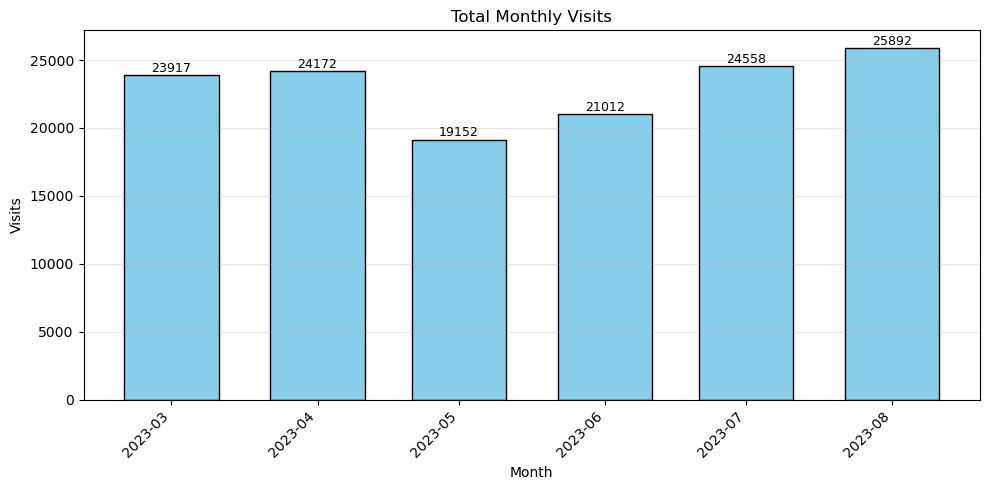

In [41]:
# 1. Итоговые визиты / Total Monthly Visits
plt.figure(figsize=(10, 5))
bars = plt.bar(metrics_monthly['date_group'], metrics_monthly['visits'],
               color='skyblue', edgecolor='black', width=20)
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 10, f'{int(h)}',
             ha='center', va='bottom', fontsize=9)
plt.title('Total Monthly Visits')
plt.xlabel('Month')
plt.ylabel('Visits')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('./charts/total_visits.png', dpi=300)
plt.show()

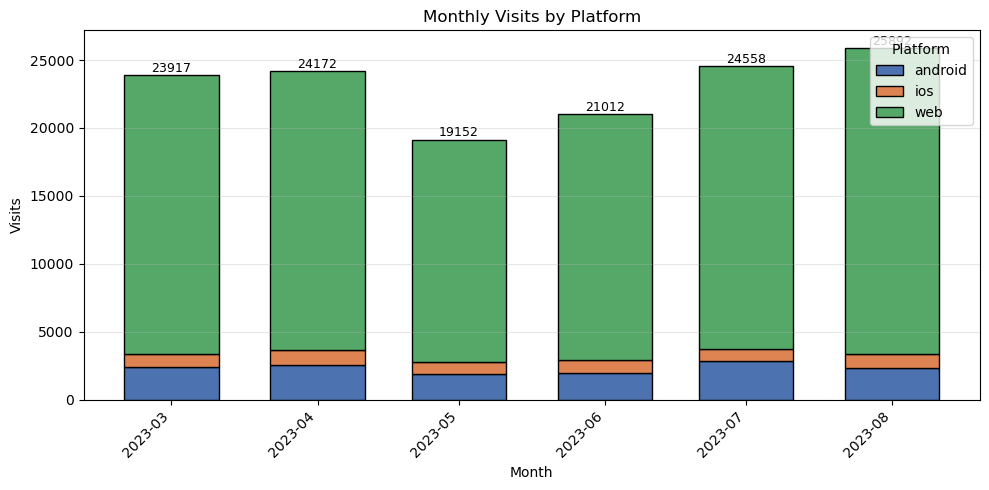

In [44]:
# 2. Итоговые визиты с разбивкой по платформам / Visits by Platform
plt.figure(figsize=(10, 5))
bottom = 0
colors = {'android': '#4C72B0', 'ios': '#DD8452', 'web': '#55A868'}
for platform in ['android', 'ios', 'web']:
    plt.bar(visits_monthly['date_group'], visits_monthly[platform],
            bottom=bottom, color=colors[platform], edgecolor='black',
            label=platform, width=20)
    bottom += visits_monthly[platform]

for i, row in visits_monthly.iterrows():
    total = row['android'] + row['ios'] + row['web']
    plt.text(row['date_group'], total + 10, str(int(total)),
             ha='center', va='bottom', fontsize=9)

plt.title('Monthly Visits by Platform')
plt.xlabel('Month')
plt.ylabel('Visits')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('./charts/visits_by_platform.png', dpi=300)
plt.show()

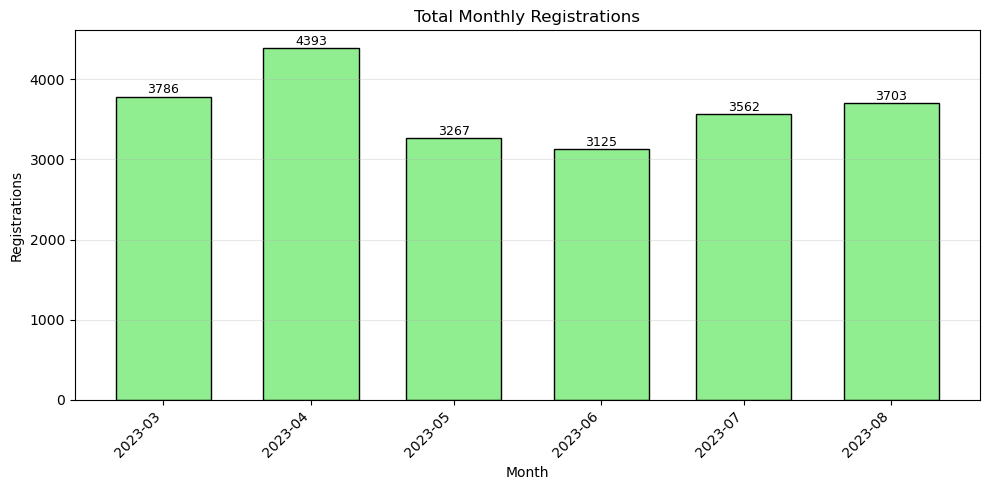

In [46]:
# 3. Итоговые регистрации / Total Registrations
plt.figure(figsize=(10, 5))
bars = plt.bar(metrics_monthly['date_group'], metrics_monthly['registrations'],
               color='lightgreen', edgecolor='black', width=20)
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 5, f'{int(h)}',
             ha='center', va='bottom', fontsize=9)
plt.title('Total Monthly Registrations')
plt.xlabel('Month')
plt.ylabel('Registrations')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('./charts/total_registrations.png', dpi=300)
plt.show()

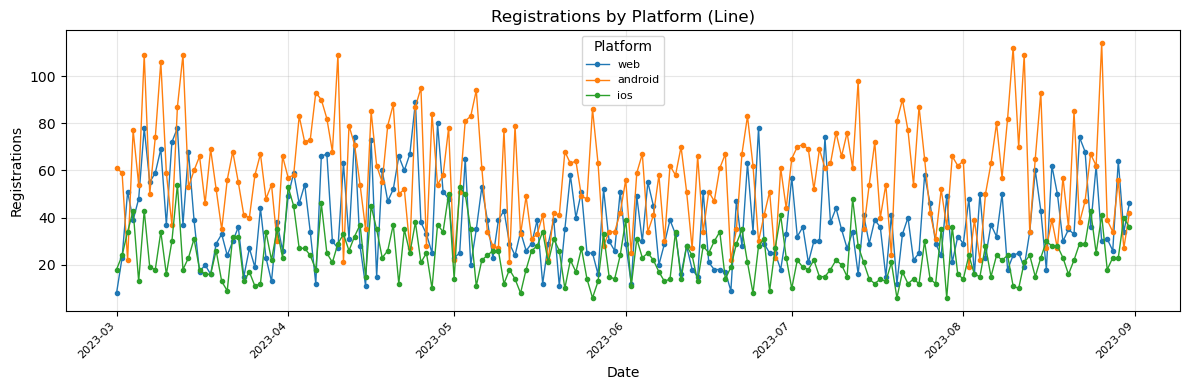

In [67]:
# 4: Registrations by Platform
plt.figure(figsize=(12, 4))
for platform in ['web', 'android', 'ios']:
    subset = conversion_df[conversion_df['platform'] == platform]
    if not subset.empty:
        plt.plot(subset['date_group'], subset['registrations'], label=platform, marker='o', linewidth=1, markersize=3)

plt.title('Registrations by Platform (Line)', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Registrations', fontsize=10)
plt.legend(title='Platform', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('./charts/registrations_by_platform.png', dpi=300)
plt.show()

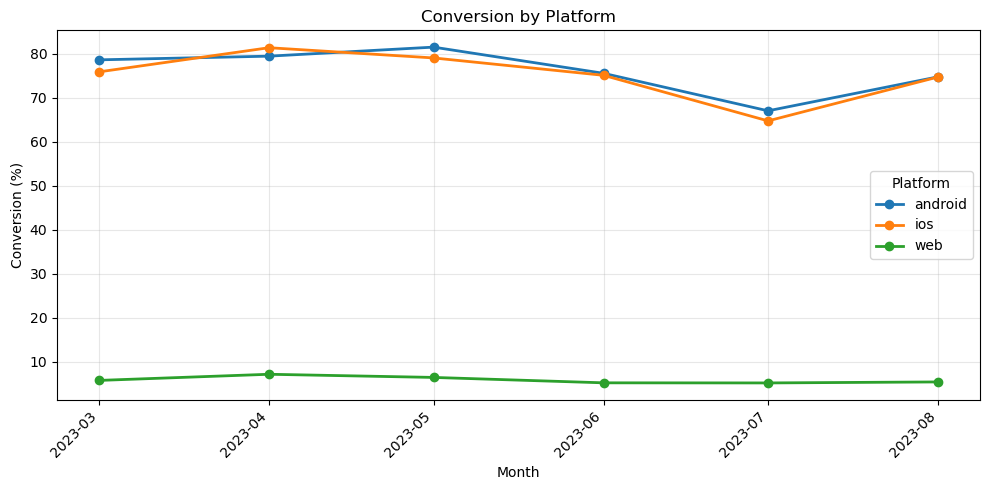

In [68]:
# 5. Conversion by Platform
# Рассчитаем конверсию по платформам по месяцам
conversion_monthly = pd.DataFrame()
for platform in ['android', 'ios', 'web']:
    v = visits_monthly.set_index('date_group')[platform]
    r = regs_monthly.set_index('date_group')[platform]
    conv = (r / v * 100).fillna(0)
    conversion_monthly[platform] = conv

conversion_monthly = conversion_monthly.reset_index()

plt.figure(figsize=(10, 5))
for platform in ['android', 'ios', 'web']:
    plt.plot(conversion_monthly['date_group'], conversion_monthly[platform],
             marker='o', label=platform, linewidth=2)
plt.title('Conversion by Platform')
plt.xlabel('Month')
plt.ylabel('Conversion (%)')
plt.legend(title='Platform')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('./charts/conversion_by_platform.png', dpi=300)
plt.show()

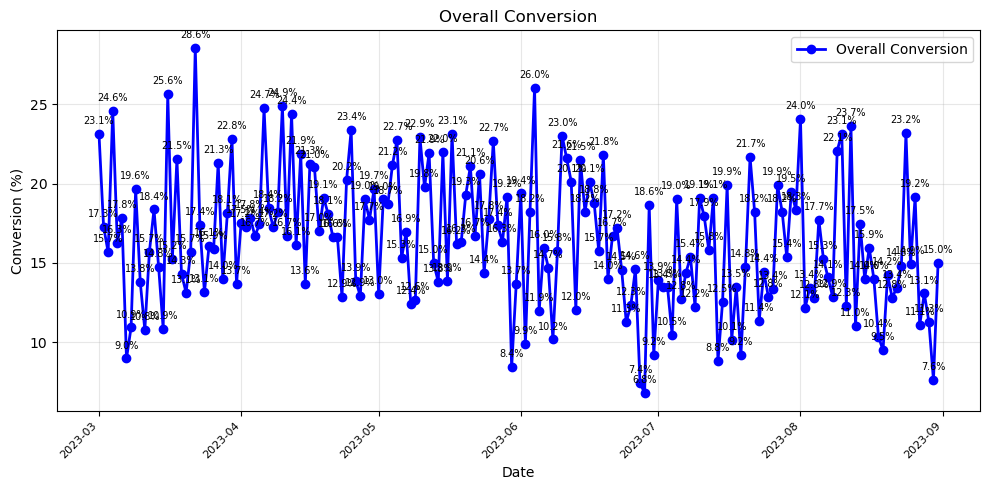

In [70]:
# 6. Средняя конверсия / Overall Conversion
# Используем уже готовый final_df с агрегированными по дням данными

# Рассчитываем общую конверсию: (регистрации / визиты) * 100
final_df['overall_conversion'] = (final_df['registrations'] / final_df['visits']) * 100

plt.figure(figsize=(10, 5))
plt.plot(final_df['date_group'], final_df['overall_conversion'],
         marker='o', linestyle='-', linewidth=2, color='blue', label='Overall Conversion')
plt.title('Overall Conversion')
plt.xlabel('Date')
plt.ylabel('Conversion (%)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(True, alpha=0.3)
plt.legend()

# Добавляем подписи значений (опционально, как на скриншотах)
for i, row in final_df.iterrows():
    if not pd.isna(row['overall_conversion']):
        plt.text(row['date_group'], row['overall_conversion'] + 0.5,
                 f"{row['overall_conversion']:.1f}%",
                 ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.savefig('./charts/overall_conversion.png', dpi=300)
plt.show()

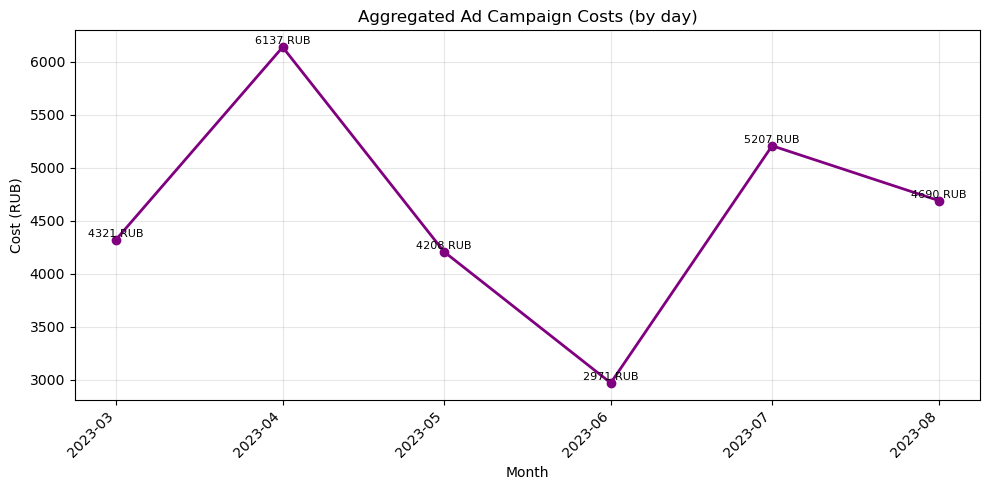

In [64]:
# 7. Суммарные затраты на рекламные кампании / Total Ad Spend by Month
plt.figure(figsize=(10, 5))
plt.plot(metrics_monthly['date_group'], metrics_monthly['cost'],
         marker='o', linewidth=2, color='purple')
for i, row in metrics_monthly.iterrows():
    plt.text(row['date_group'], row['cost'] + 10, f"{int(row['cost'])} RUB",
             ha='center', va='bottom', fontsize=8)
plt.title('Aggregated Ad Campaign Costs (by day)')
plt.xlabel('Month')
plt.ylabel('Cost (RUB)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('./charts/ad_campaign_costs.png', dpi=300)
plt.show()

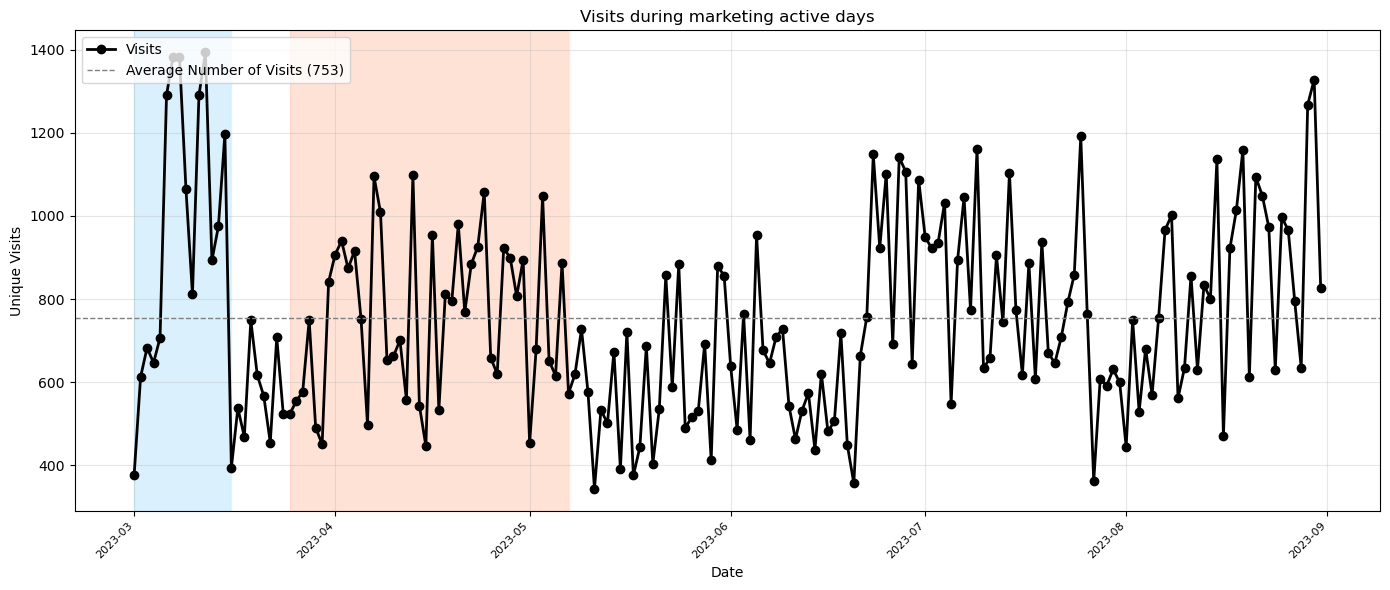

In [57]:
# 8. Visits during marketing active days (по дням, с цветовыми зонами)
plt.figure(figsize=(14, 6))

# Строим линию визитов
plt.plot(final_df['date_group'], final_df['visits'], marker='o', linestyle='-', linewidth=2, color='black', label='Visits')

# Добавляем среднюю линию
avg_visits = final_df['visits'].mean()
plt.axhline(avg_visits, color='gray', linestyle='--', linewidth=1, label=f'Average Number of Visits ({int(avg_visits)})')

# Определяем цвета для кампаний
colors = {
    'advanced_algorithms_series': '#87CEFA',   # светло-голубой
    'virtual_reality_workshop': '#FFA07A',      # персиковый
    'none': 'white'
}

# Рисуем цветные зоны
current_campaign = None
start_date = None

for i, row in final_df.iterrows():
    campaign = row['utm_campaign']
    if campaign != current_campaign:
        if current_campaign and start_date:
            # Закрашиваем предыдущую зону
            end_date = row['date_group']
            plt.axvspan(start_date, end_date, color=colors.get(current_campaign, 'white'), alpha=0.3)
        current_campaign = campaign
        start_date = row['date_group']

# Закрашиваем последнюю зону
if current_campaign and start_date:
    plt.axvspan(start_date, final_df['date_group'].iloc[-1], color=colors.get(current_campaign, 'white'), alpha=0.3)

# Оформление
plt.title('Visits during marketing active days', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Unique Visits', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./charts/visits_during_marketing.png', dpi=300)
plt.show()

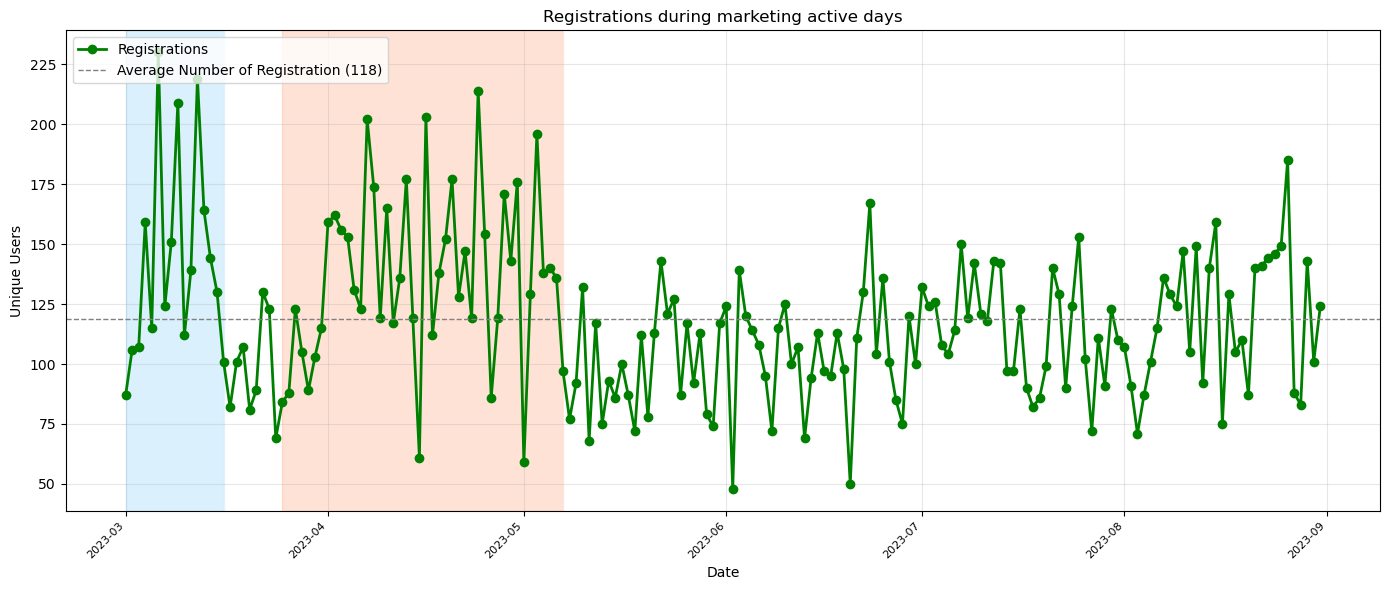

In [56]:
# 9. Registrations during marketing active days (по дням, с цветовыми зонами)
plt.figure(figsize=(14, 6))

# Строим линию регистраций
plt.plot(final_df['date_group'], final_df['registrations'], marker='o', linestyle='-', linewidth=2, color='green', label='Registrations')

# Добавляем среднюю линию
avg_regs = final_df['registrations'].mean()
plt.axhline(avg_regs, color='gray', linestyle='--', linewidth=1, label=f'Average Number of Registration ({int(avg_regs)})')

# Рисуем цветные зоны (те же, что и выше)
current_campaign = None
start_date = None

for i, row in final_df.iterrows():
    campaign = row['utm_campaign']
    if campaign != current_campaign:
        if current_campaign and start_date:
            plt.axvspan(start_date, row['date_group'], color=colors.get(current_campaign, 'white'), alpha=0.3)
        current_campaign = campaign
        start_date = row['date_group']

if current_campaign and start_date:
    plt.axvspan(start_date, final_df['date_group'].iloc[-1], color=colors.get(current_campaign, 'white'), alpha=0.3)

# Оформление
plt.title('Registrations during marketing active days', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Unique Users', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./charts/registrations_during_marketing.png', dpi=300)
plt.show()